# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [89]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [90]:
stock_data = pd.read_csv("stock_data.csv")

In [91]:
#copying data to avoid any changes to original data
data = stock_data.copy()

In [92]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


In [93]:
# let's view a sample of the data
data.sample(
    10, random_state=2)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
55,CBG,CBRE Group,Real Estate,Real Estate Services,34.580002,8.197757,1.297857,20,12,-200481000,547132000,1.64,3.336171e+08,21.085367,-3.415302
283,SWKS,Skyworks Solutions,Information Technology,Semiconductors,76.830002,-8.513933,2.017394,25,225,237800000,798300000,4.21,1.896200e+08,18.249407,7.413777
194,LYB,LyondellBasell,Materials,Diversified Chemicals,86.900002,2.573183,1.609745,68,46,-107000000,4476000000,9.62,4.652807e+08,9.033264,10.316354
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
67,CL,Colgate-Palmolive,Consumer Staples,Household Products,66.620003,4.781379,0.895471,463,27,-119000000,1384000000,1.53,9.045752e+08,43.542486,-0.548324
70,CMG,Chipotle Mexican Grill,Consumer Discretionary,Restaurants,479.850006,-33.131268,2.474002,22,237,-171460000,475602000,15.30,3.108510e+07,31.362745,17.201329
69,CME,CME Group Inc.,Financials,Financial Exchanges & Data,90.599998,-2.402245,1.323348,6,99,326500000,1247000000,3.71,3.361186e+08,24.420485,-58.649536
94,DISCK,Discovery Communications-C,Consumer Discretionary,Cable & Satellite,25.219999,3.572891,1.812144,19,25,23000000,1034000000,-2.43,1.115226e+08,20.819876,-76.119077
146,GWW,Grainger (W.W.) Inc.,Industrials,Industrial Materials,202.589996,-5.336199,1.348597,34,16,63492000,768996000,11.69,6.578238e+07,17.330196,12.112879
141,GLW,Corning Inc.,Information Technology,Electronic Components,18.280001,6.588927,1.578483,7,163,-809000000,1339000000,1.02,1.312745e+09,17.921570,3.617610


* For now no values seem to be missing. We will investigate this later.

* Columns seem to be formatted correctly. We will investigate this later if need be.

In [94]:
# checking for duplicate values in the data
data.duplicated().sum()

0

In [95]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are 11 numeric (*float* and *int* type) and  4 string (*object* type) columns in the data.
* There are no null values in the dataset.

In [96]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


* Ticker Symbol and Security only have unique values. We will therefore delete these columns beccause they will not be necessary for the model.
* Overal historical trends are showing the stock prices going up. However not all stocks are increasing in value. 

&emsp;

* Top GICS Sector is Industrials and top GICS Sub Industry is Oil & Gas Exploration & Production
* Mean current price is 80.9 USD with a standard deviation of 98.1 USD.
* Mean price change over the last 13 weeks is 4.1 USD with a standard deviation of 12.0 USD. Min price change is -47.1 USD and the max is 55.1 USD.
* Mean volatility over the last 13 weeks is 1.5.
* Mean ROE is 39.6 and a standard deviation of 96.5
* Mean cash ratio is 70.0 and a standard deviation of 90.4.
* Mean net cash flow is 55.5 million USD with a standard deviation of 1946.4 million USD. Min net cash flow is -1120.8 million USD and the max is 20764.0 million USD.
* Mean net income is 1494.4 million USD and a standard deviation of 3940.2 million USD. Min net income is -23528.0 million USD and the max is 24442.0 million USD.
* Mean earnings per share is 2.8 USD with a standard deviation of 6.6 USD. Min earnings per share is -61.2 USD and the max is 50.1 USD.
* Mean estimated shares outstanding is 577.0 million and a standard deviation of 845.8 million.
* Mean P/E ratio is 32.6 and a standard deviation of 44.3. Min P/E ratio is 2.9 and max is 528.0.
* Mean P/B ratio is -1.7 and a standard deviation of 14.0. Min P/B ratio is -76.1 and max is 129.1.

In [97]:
# Dropping Ticker Symbol as it is not necessary for this analysis
data = data.drop(["Ticker Symbol"], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [98]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [99]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### GICS Sector

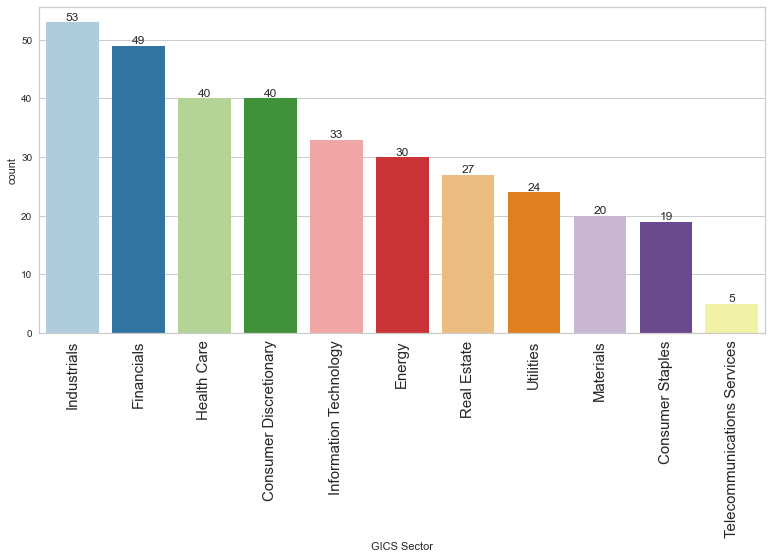

In [100]:
labeled_barplot(data,"GICS Sector")

* Industrials is the top GICS sector, followed by Financials, followed jointly by Health Care and Consumer Discretionary
* Telecommunications Services is the least common GICS sector in this dataset.

#### GICS  Sub Industry

In [101]:
data["GICS Sub Industry"].value_counts().head(5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Name: GICS Sub Industry, dtype: int64

* Oil & Gas Exploration & Production is the top GICS Sub Industry, followed jointly by REITs and Industrial Conglomerates.

#### Current Price. 
* What does the distribution of stock prices look like?

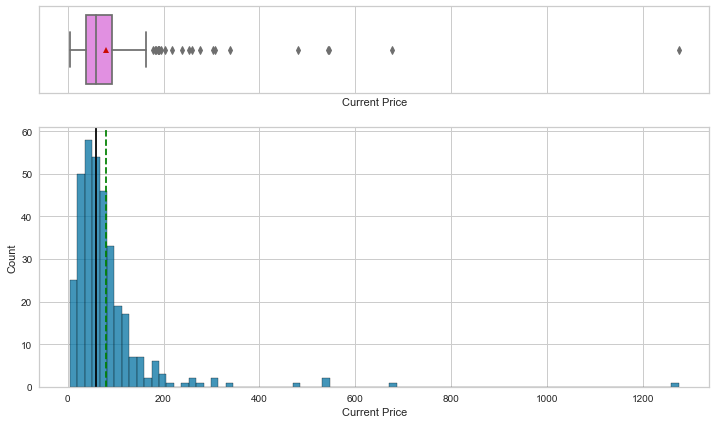

In [102]:
histogram_boxplot(data,"Current Price")

* Right-skewed distribution with outliers on the right end of the box plot.
* There is a wide range in stock prices.
* Median current price is about 70 USD.

In [103]:
# 5 stocks have a current price of over 400 USD. Far larger than the average.
data[data["Current Price"] > 400]

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
26,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.890015,32.268105,1.460386,4,58,1333000000,596000000,1.28,4.656250e+08,528.039074,3.904430
70,Chipotle Mexican Grill,Consumer Discretionary,Restaurants,479.850006,-33.131268,2.474002,22,237,-171460000,475602000,15.30,3.108510e+07,31.362745,17.201329
171,Intuitive Surgical Inc.,Health Care,Health Care Equipment,546.159973,18.733013,1.126009,14,317,114300000,588800000,15.87,3.710145e+07,34.414617,42.607500
243,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.949951,3.190527,1.268340,29,184,-1671386000,2551360000,50.09,5.093552e+07,25.453183,-1.052429
264,Regeneron,Health Care,Biotechnology,542.869995,16.995320,1.802345,17,129,160383000,636056000,6.17,1.030885e+08,87.985412,20.409000


#### Price Change

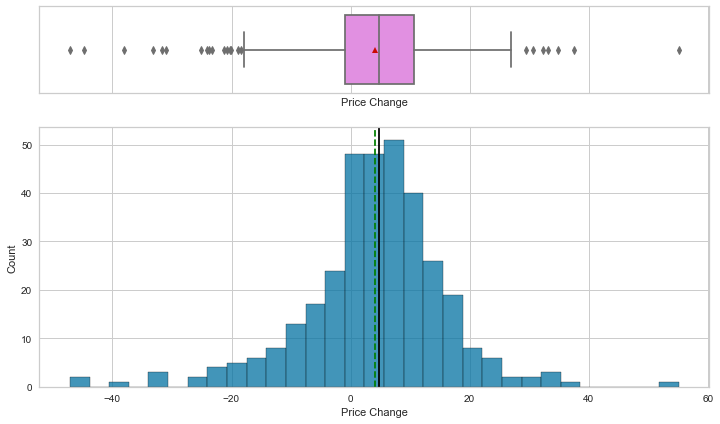

In [104]:
histogram_boxplot(data,"Price Change")

* Normal distribution with outliers on both ends of the box plot.
* Mean and median price change is about the same. Around 4 USD.

#### Volatility

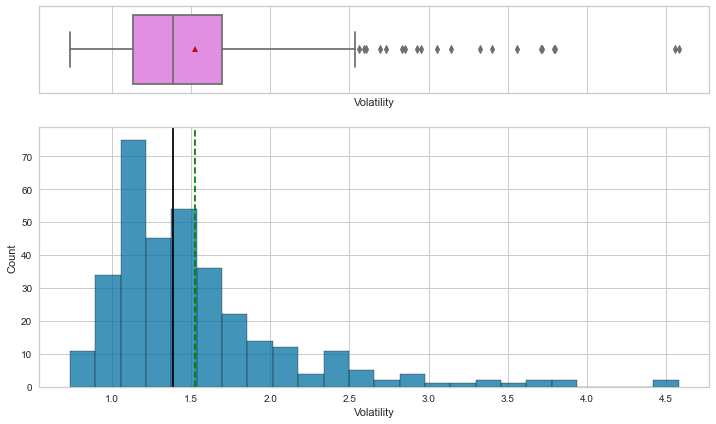

In [105]:
histogram_boxplot(data,"Volatility")

* Right-skewed distribution with outliers on the right end of the box plot.
* Median volatility is around 1.4.

#### ROE

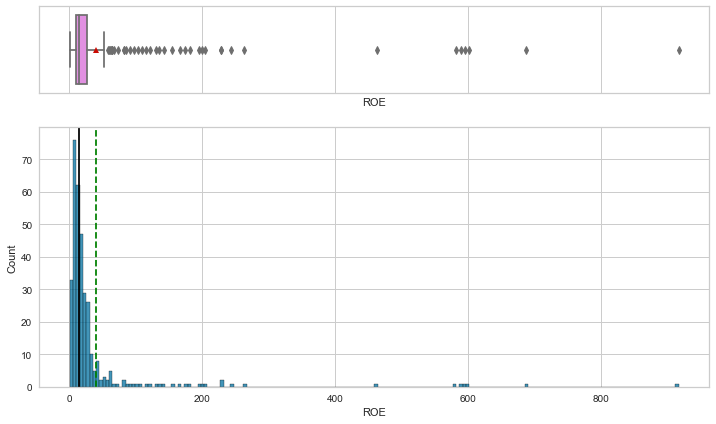

In [106]:
histogram_boxplot(data,"ROE")

* Heavily right-skewed with many outliers on the right end of the box plot. Difficult to interprete. For visual purposes, let's narrow the focus to ROE of 200.
* Some stocks have a ROE of over 100. While this could simply mean that they are really profitable, this is exceptionally high and it is recommended to do a deeper dive into these stocks before investing.

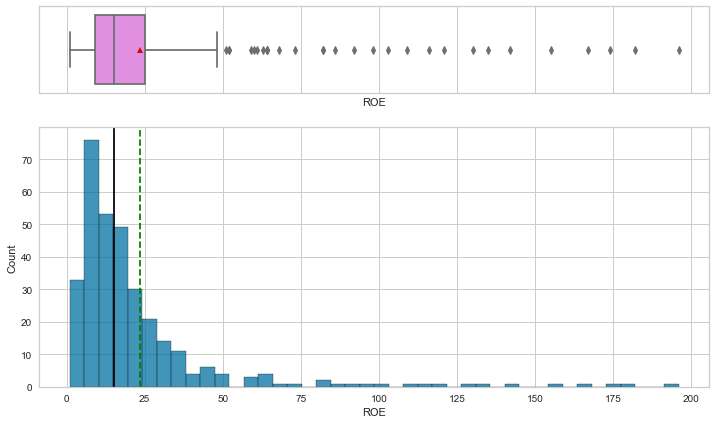

In [107]:
data_ROE = data[data["ROE"]<200]

histogram_boxplot(data_ROE,"ROE")

* Again we can see that the graph is heavily right-skewed with many outliers on the right end of the box plot.

#### Cash Ratio

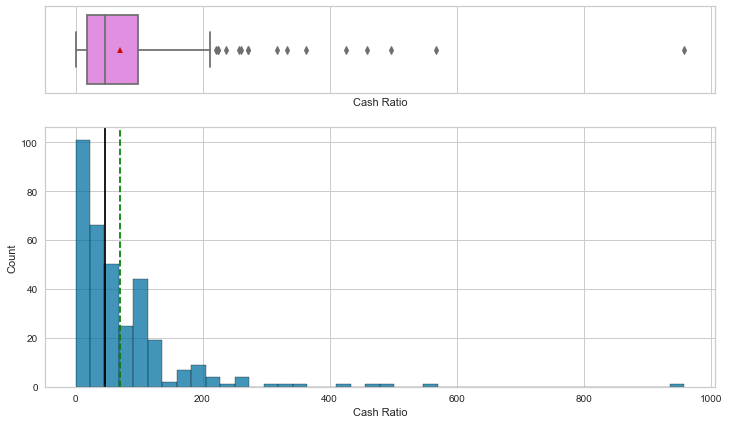

In [108]:
histogram_boxplot(data,"Cash Ratio")

* Right-skewed distribution with outliers on the right end of the box plot.
* A few stocks have a cash ratio of over 400.
* Median cash ratio is around 50.

#### Net Cash Flow

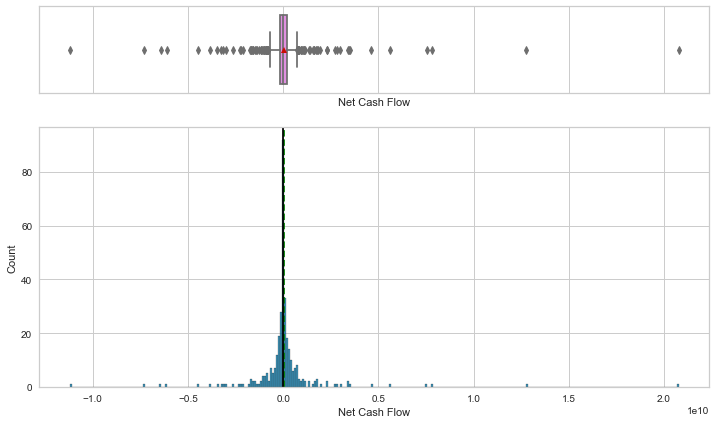

In [109]:
histogram_boxplot(data,"Net Cash Flow")

* It seems to be a normal distribution. Difficult to interprete. For visual purposes, let's narrow the focus.

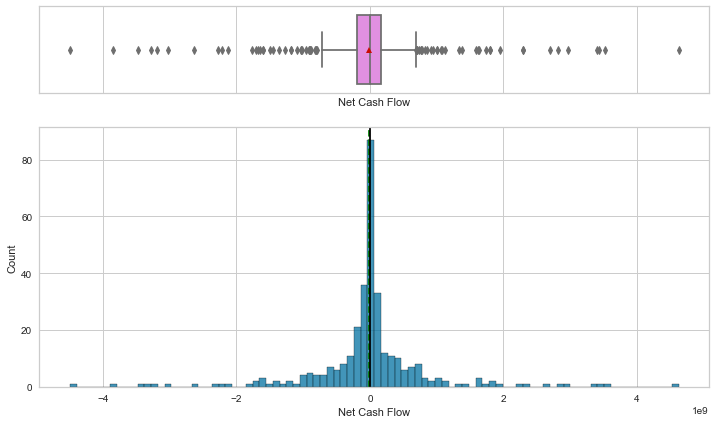

In [110]:
data_NetCashFlow = data[(data["Net Cash Flow"]>-5000000000) & (data["Net Cash Flow"]<5000000000)]

histogram_boxplot(data_NetCashFlow,"Net Cash Flow")

* Net Cash Flow has a normal distribution.
* There are outliers on both ends of the box plot.

#### Net Income

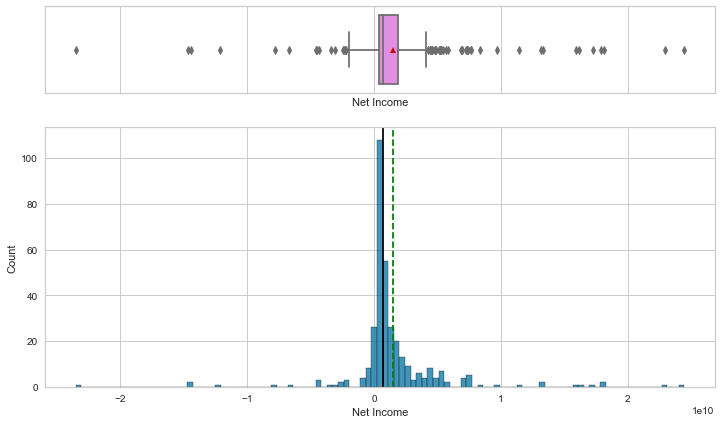

In [111]:
histogram_boxplot(data,"Net Income")

* Right skewed distribution.
* Median and mean net income are positive.
* Outliers on both ends of the box plot, but mostly on the right end.

#### Earnings per share

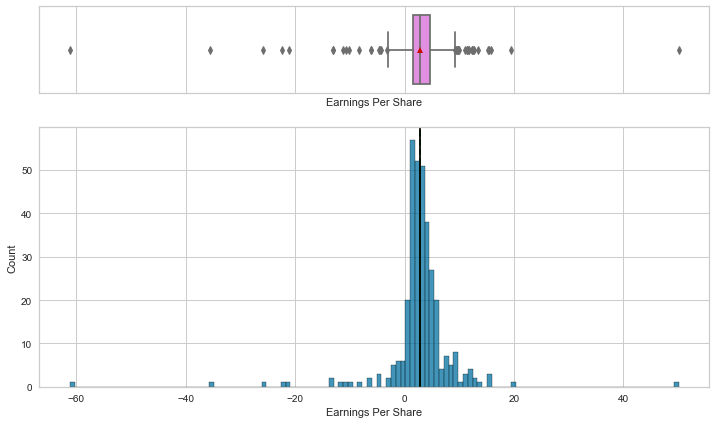

In [112]:
histogram_boxplot(data,"Earnings Per Share")

* Normal distribution.
* Median and mean earnings per share are positive.
* Outliers on both ends of the box plot.

In [113]:
#### Estimated shares outstanding

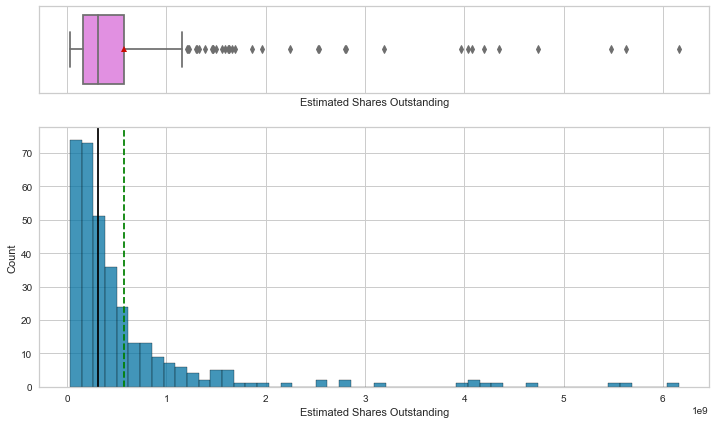

In [114]:
histogram_boxplot(data,"Estimated Shares Outstanding")

* Right-skewed distribution.
* Median estimated shares outstanding is around 0.3.
* Outliers on the right end of the box plot.

#### P/E ratio

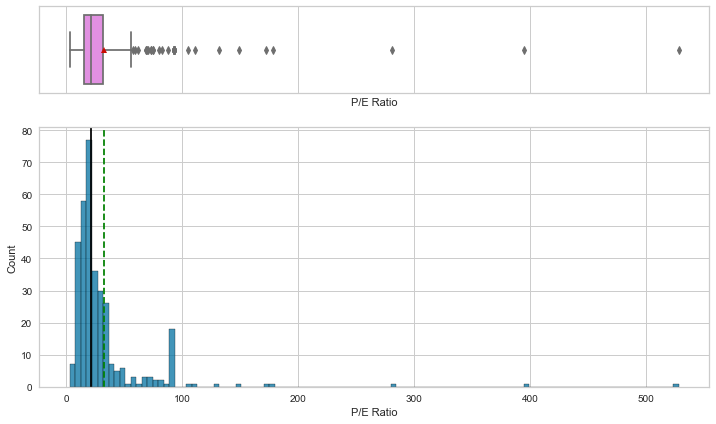

In [115]:
histogram_boxplot(data,"P/E Ratio")

* Right-skewed distribution.
* Outliers on the right end of the box plot.
* There are many stocks that have a P/E ratio (over 25). It would need to be further investigated, but these stocks are probably overvalued. It is recommended to not invest too aggressively into stocks that are potentially overvalued. If the majority of the stocks are overvalued, this could also mean that the market is overvalued. 

#### P/B ratio

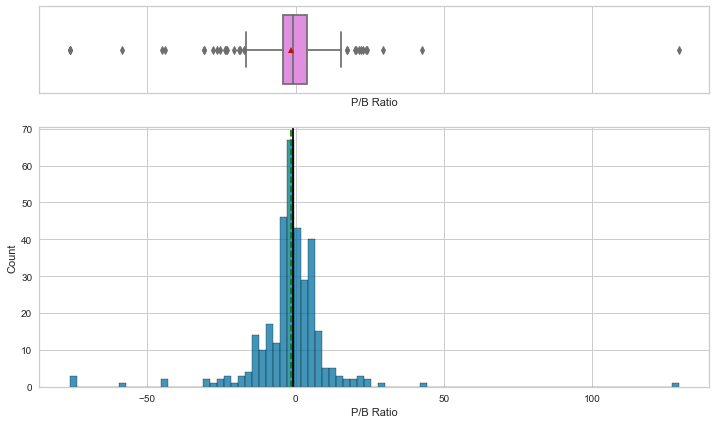

In [116]:
histogram_boxplot(data,"P/B Ratio")

* Normal distribution.
* Outliers on the right end of the box plot.
* There are some stocks that have a high P/B ratio (potentially overvalued) and some stocks that have a low P/B ratio (potentially undervalued). It would need to be further investigated, but it might make sense to prioritize investing in stocks that have a low P/B ratio. However low P/B ratio can also mean foundational problems within the company.

### Bivariate Analysis

#### Correlation between numeric features. 
* How are the different features correlated with each other?

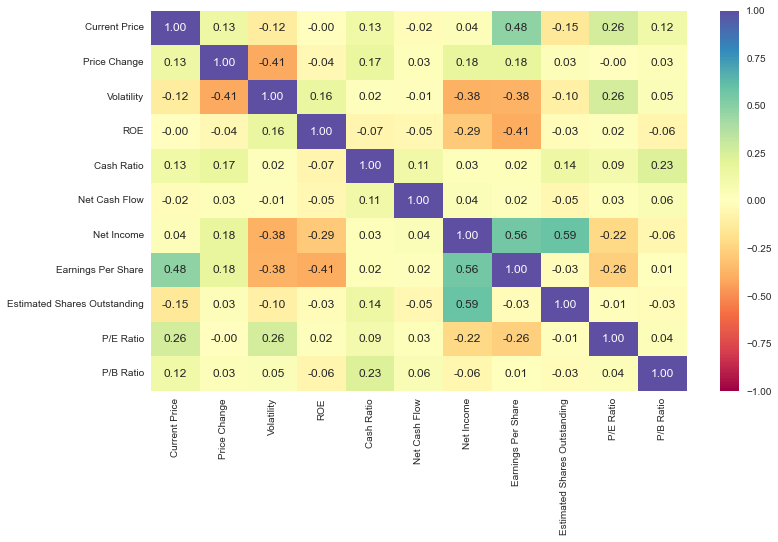

In [117]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no strongly correlated patterns (>0.75) between any of the features. However there is some correlation between some of the features:
    * -0.41 correlation between volatility and price change
    * 0.48 correlation between earnings per share and current price
    * -0.41 correlation between earnings per share and ROE
    * 0.56 correlation between earnings per share and net income
    * 0.59 correlation between estimated shares outstanding and net income

&emsp;

* There was less correlation between the following features
    * -0.38 correlation between net income and volatility
    * -0.29 correlation between net income and ROE
    * -0.38 correlation between earnings per share and volatility
    * 0.26 correlation between P/E ratio and current price
    * 0.26 correlation between P/E ratio and volatility
    * 0.23 correlation between P/B ratio and cash ratio
    * -0.22 correlation between P/E ratio and net income
    * -0.26 correlation between P/E ratio and earnings per share

#### GICS Sector versus Price Change. 
* The stocks of which economic sector have seen the maximum price increase on average?

<AxesSubplot:xlabel='GICS Sector', ylabel='Price Change'>

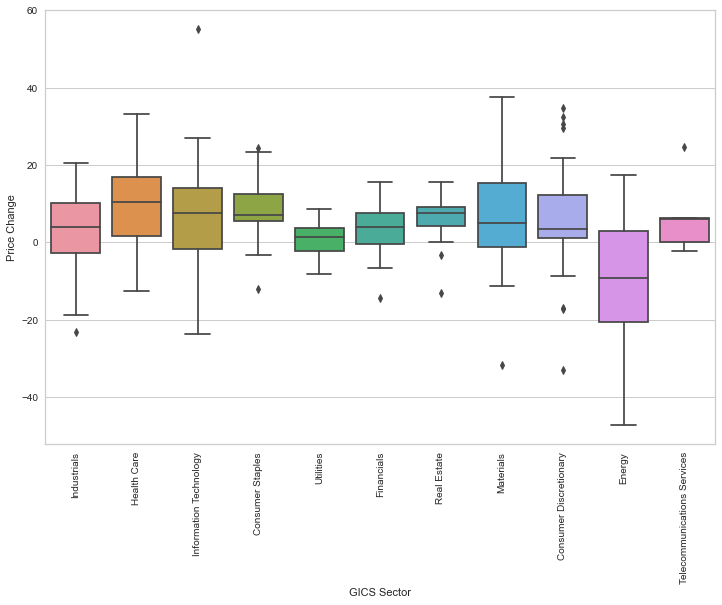

In [118]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Price Change",x="GICS Sector")

* Mean price change for all sectors was positive with the exception of Energy. The Energy sector had the lowest performing stocks during the last 13 weeks.
* Mean price change for Utilities was only slightly higher than 0.
* All sectors had stocks with positive and negative price changes.
* Mean price change for the Health Care sector was the highest in the last 13 weeks.
* All sectors had outliers with the exception of Health Care and Utilities.
* Consumer Discretionary has many outliers. On both ends of the box plot.

#### GICS Sector versus Volatility

<AxesSubplot:xlabel='GICS Sector', ylabel='Volatility'>

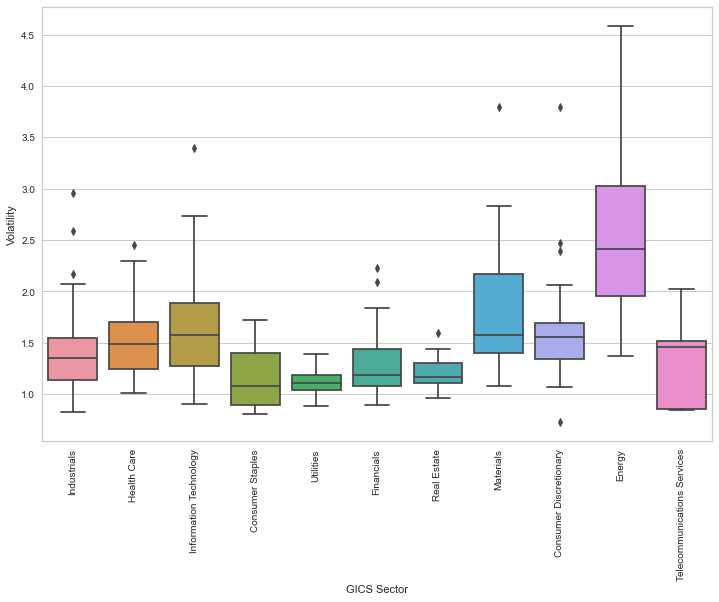

In [119]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Volatility",x="GICS Sector")

* Energy sector experienced the most volatility in the past 13 weeks. 
* Consumer Staples, Utilities and Real Estate experienced very little volatility.
* All sectors had outliers with the exception of Consumer Staples, Utilities, and Energy

#### GICS Sector versus Cash Ratio. 
* Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents.
* How does the average cash ratio vary across economic sectors?

<AxesSubplot:xlabel='GICS Sector', ylabel='Cash Ratio'>

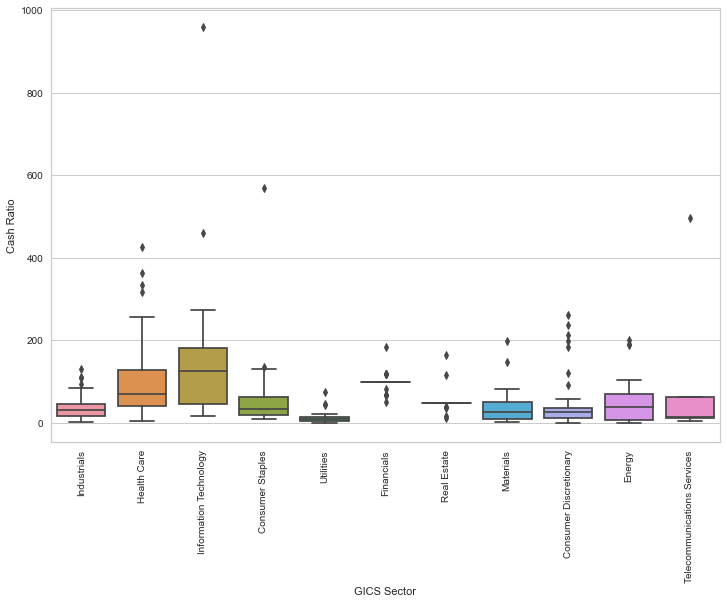

In [120]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Cash Ratio",x="GICS Sector")

* Average cash ratio is highest for Information Technology followed by Financials, followed by Health Care. The cash ratio of the other sectors is quite small in comparison.
* All sectors have outliers
* Boxplots for Utilities, Financials and Real Estate are very narrow. This suggests little variability.

#### GICS Sector versus Net Cash Flow.

<AxesSubplot:xlabel='GICS Sector', ylabel='Net Cash Flow'>

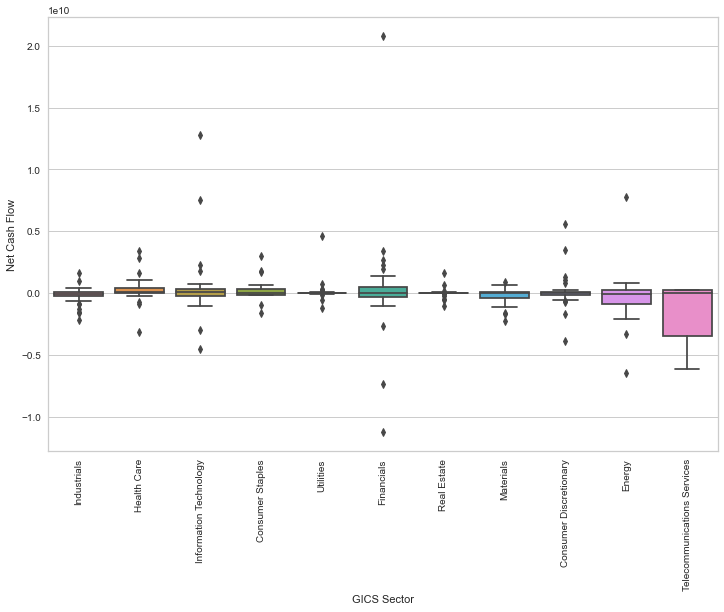

In [121]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Net Cash Flow",x="GICS Sector")

* Net cash flow is mostly negative for stocks in the Telecommunications Services sector. The boxplot is also widest compared to the other sectors.
* There are many outliers that have a negative cash flow for all sectors. These might be some of the lowest performing companies compared to the competition. 
* Mean net cash flow is close to zero for all sectors.

#### GICS Sector versus Net Income.

<AxesSubplot:xlabel='GICS Sector', ylabel='Net Income'>

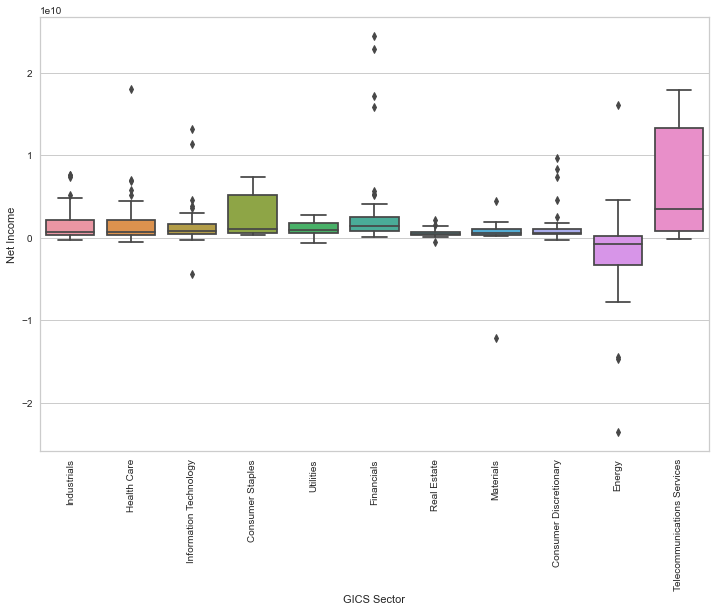

In [122]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Net Income",x="GICS Sector")

* Energy sector mostly has stocks with a negative net income. 
* The majority of stocks have a positive net income with the exception of the energy sector and a few outliers for Information Technology and Materials. 
* Telecommunications Services sector has the highest mean net income. 
* There are many Financial stocks which are outliers and have a high net income.

#### GICS Sector versus Earnings Per Share

<AxesSubplot:xlabel='GICS Sector', ylabel='Earnings Per Share'>

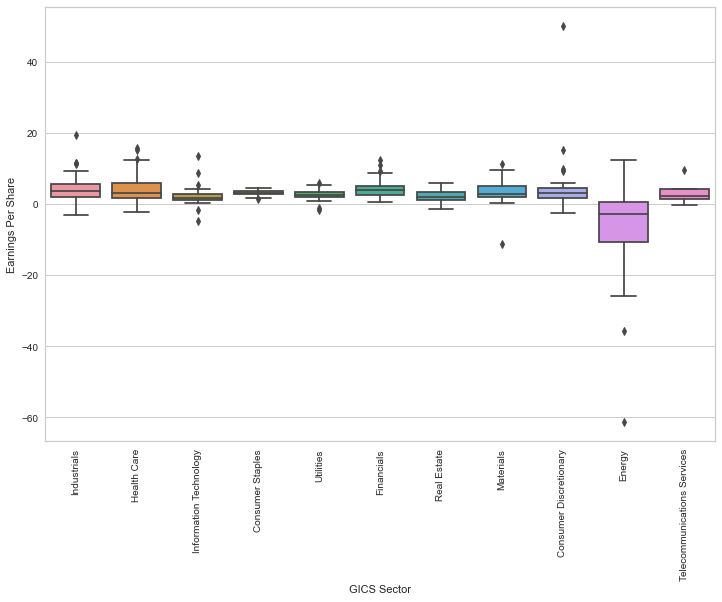

In [123]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Earnings Per Share",x="GICS Sector")

* Energy sector is the only sector with a mean negative earnings per share.
* The mean earnings per share is close to zero for the other sectors.
* All sectors have outliers with the exception of real estate.

#### GICS Sector versus Estimated Shares Outstanding

<AxesSubplot:xlabel='GICS Sector', ylabel='Estimated Shares Outstanding'>

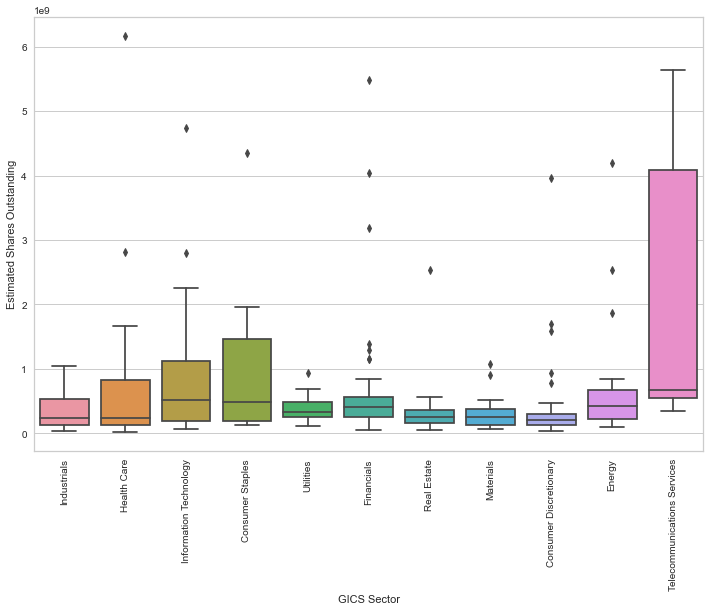

In [124]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="Estimated Shares Outstanding",x="GICS Sector")

* Wide boxplot for Telecommunications Services Sector. Mean estimated shares outstanding is also highest, followed by Information Technology, followed by Consumer Staples.
* All sectors have outliers with the exception of Industries and Telecommunications Services.

#### GICS Sector versus P/E Ratio. 

* P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

<AxesSubplot:xlabel='GICS Sector', ylabel='P/E Ratio'>

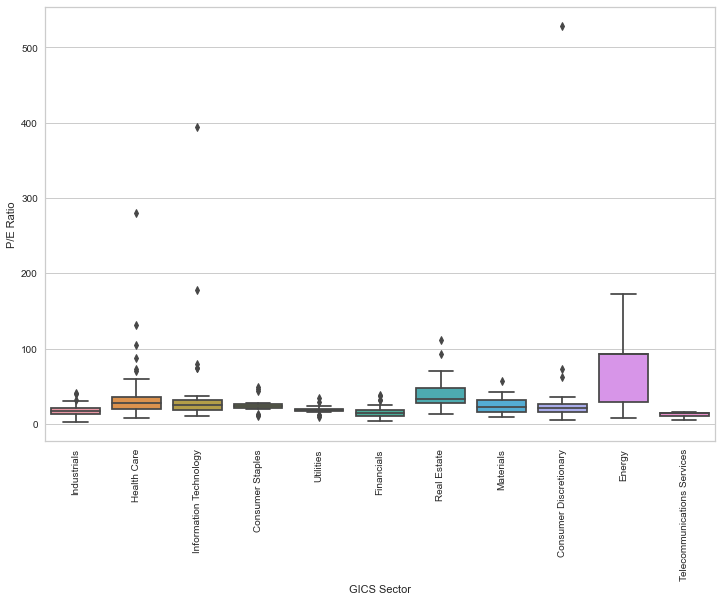

In [125]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="P/E Ratio",x="GICS Sector")

* P/E ratio varies most for the Energy sector. Followed by Real Estate
* P/E ratio does not vary greatly for several sectors. Especially, Consumer Staples, Utilities and Telecommunications Services.
* All sectors have outliers except for Energy and Telecommunications Services.
* Health Care and Information Technology have many outliers with very high P/E Ratios.

#### GICS Sector versus P/B Ratio. 

<AxesSubplot:xlabel='GICS Sector', ylabel='P/B Ratio'>

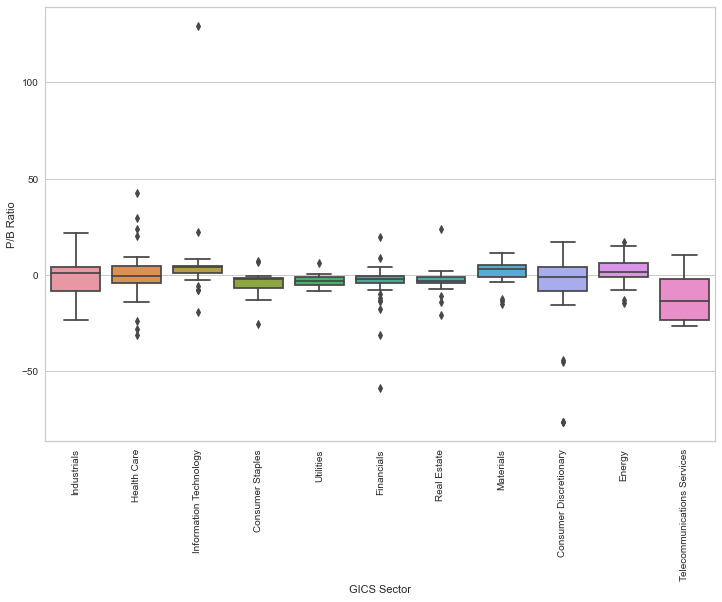

In [126]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=data,y="P/B Ratio",x="GICS Sector")

* Mean P/B Ratio is lowest for the Telecommunications sector.
* None of the sectors have a high P/B ratio. Most of them are close to zero. 
* There are many outliers. However there are no outliers for the Industries and Telecommunications Services sectors.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [127]:
# checking for duplicate values in the data
data.duplicated().sum()

0

- There are no duplicate values in the data.

In [128]:
# checking for missing values in the data
data.isnull().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing values in the data.

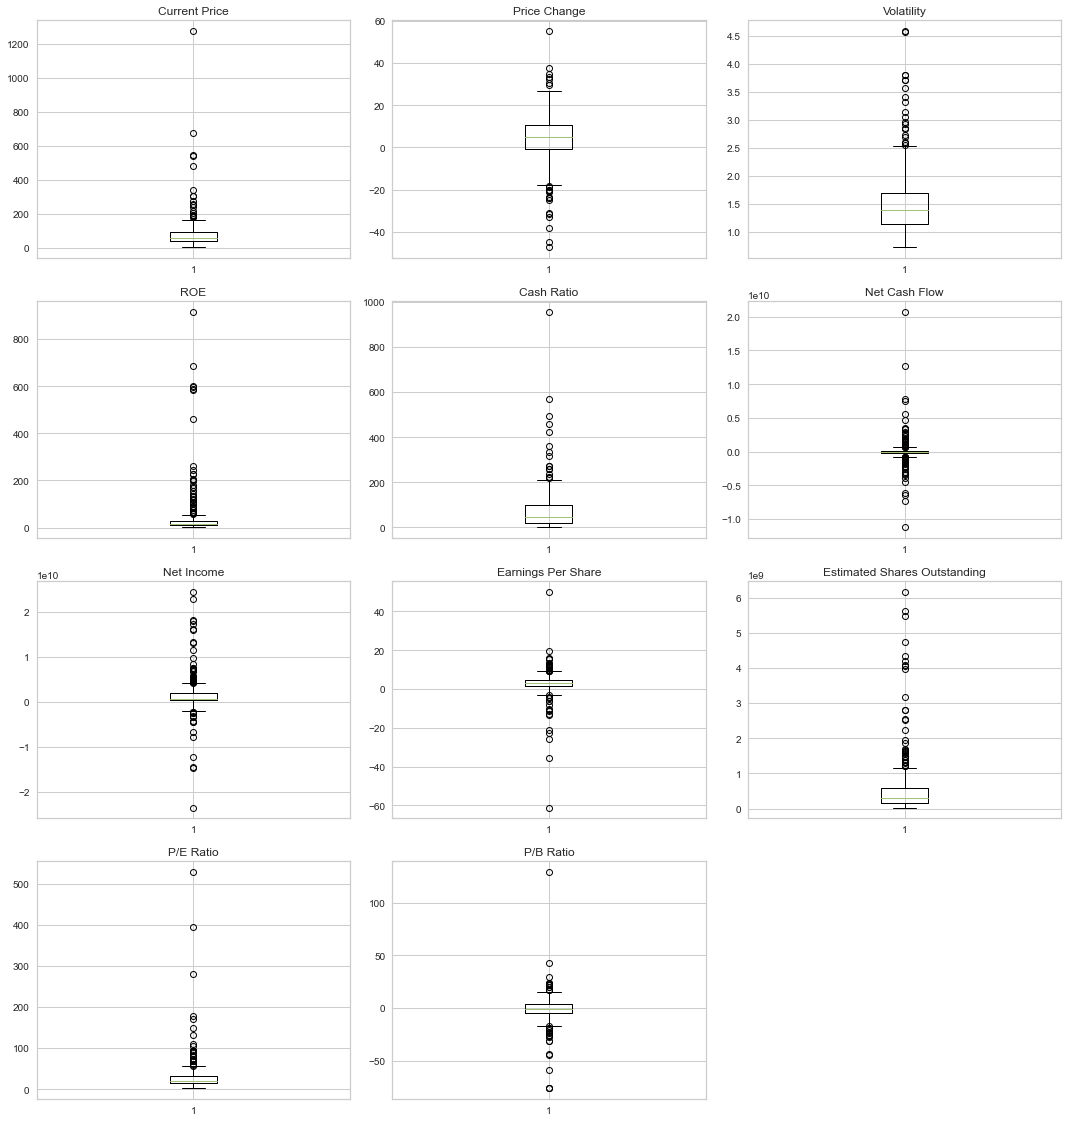

In [129]:
# Outlier check
out_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [130]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[cols_list].copy()
subset_scaled = scaler.fit_transform(subset)

In [131]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [132]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


* No further feature engineering is needed nor any other preprocessing steps.
* Besides scaling, no other changes were made during the data preprocessing stage. We therefore do not need to re-explore EDA and can now move on to the clustering phase. 

## K-means Clustering

In [133]:
k_means_df = subset_scaled_df.copy()

#### Elbow Method

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.384499097487295
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1770961257432995
Number of Clusters: 5 	Average Distortion: 2.107108370017741
Number of Clusters: 6 	Average Distortion: 2.069402881418923
Number of Clusters: 7 	Average Distortion: 2.0275021752667772
Number of Clusters: 8 	Average Distortion: 1.9744364240605479
Number of Clusters: 9 	Average Distortion: 1.9386203999046159
Number of Clusters: 10 	Average Distortion: 1.8558704916762723
Wall time: 11.7 s


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

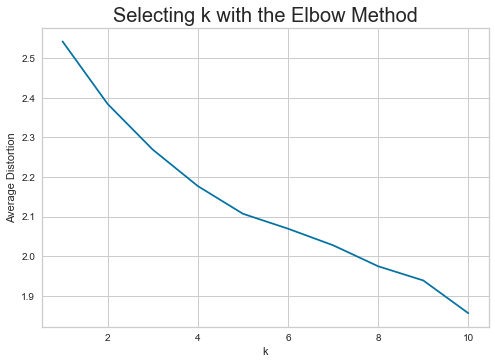

In [134]:
%%time

#Determining number of clusters using K-means
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(
            np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* The appropriate value of k from the elbow curve seems to be 4 or 6. Let's check the silhouette scores.

#### Silhouette Scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45547866229080475
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.4153869737950477
For n_clusters = 6, silhouette score is 0.41895223012505106
For n_clusters = 7, silhouette score is 0.3819053080423037
For n_clusters = 8, silhouette score is 0.4015564593060612
For n_clusters = 9, silhouette score is 0.17831312476537764
For n_clusters = 10, silhouette score is 0.13815583683139762
Wall time: 11.1 s


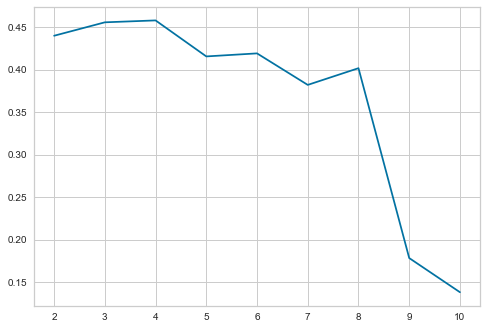

In [135]:
%%time

sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((k_means_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* From the silhouette score, it seems that 3 is a good value for k. 
* We could also consider 2 and 4.

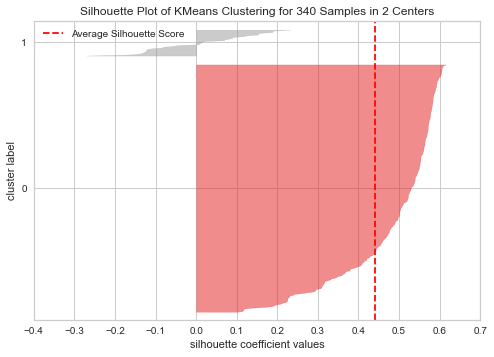

Wall time: 1.51 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [136]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

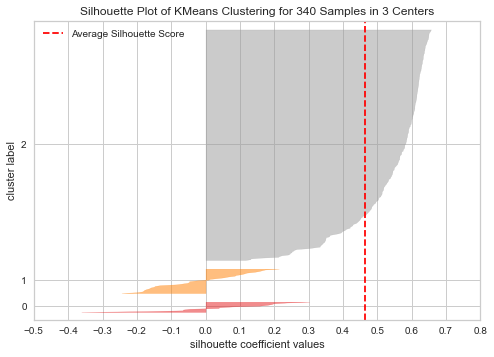

Wall time: 1.52 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [137]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

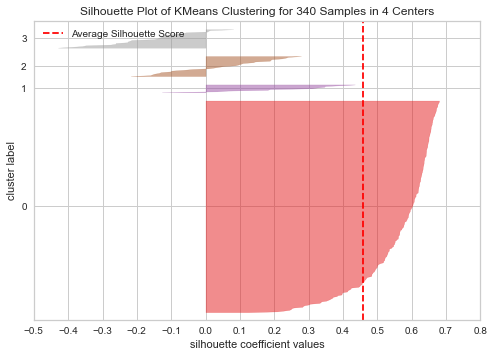

Wall time: 1.52 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [138]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

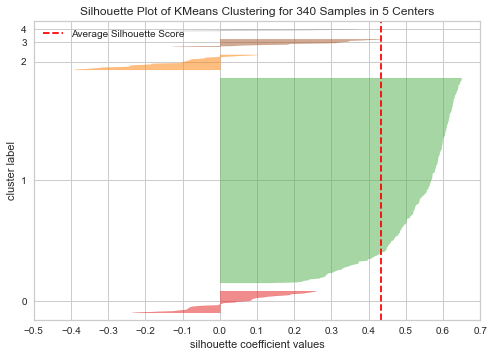

Wall time: 1.56 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [139]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

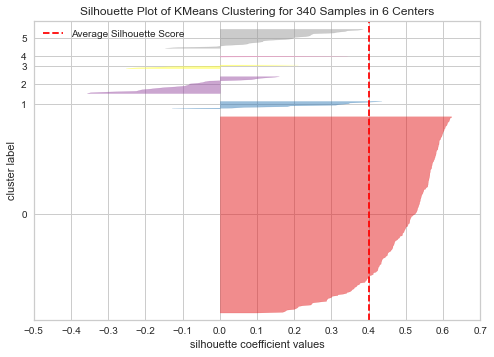

Wall time: 1.55 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [140]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

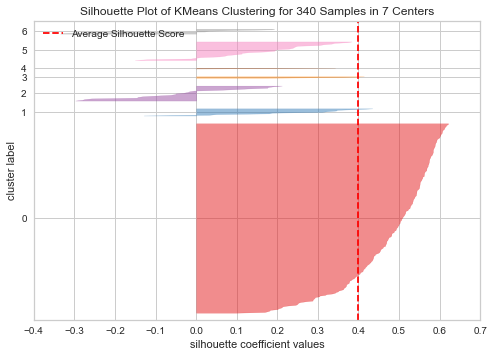

Wall time: 1.55 s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [141]:
%%time

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

* Based on the results of the elbow method and the silhouette score, we will select 4 clusters at the appropriate number.

In [142]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=0)

In [143]:
# creating a copy of the original data
df2 = data.copy()

# adding kmeans cluster labels to the original dataframe
k_means_df["K_means_segments"] = kmeans.labels_
df2["K_means_segments"] = kmeans.labels_

In [144]:
cluster_profile = df2.groupby("K_means_segments").mean()

In [145]:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Price Change"].count().values
)

In [146]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


IndexError: list index out of range

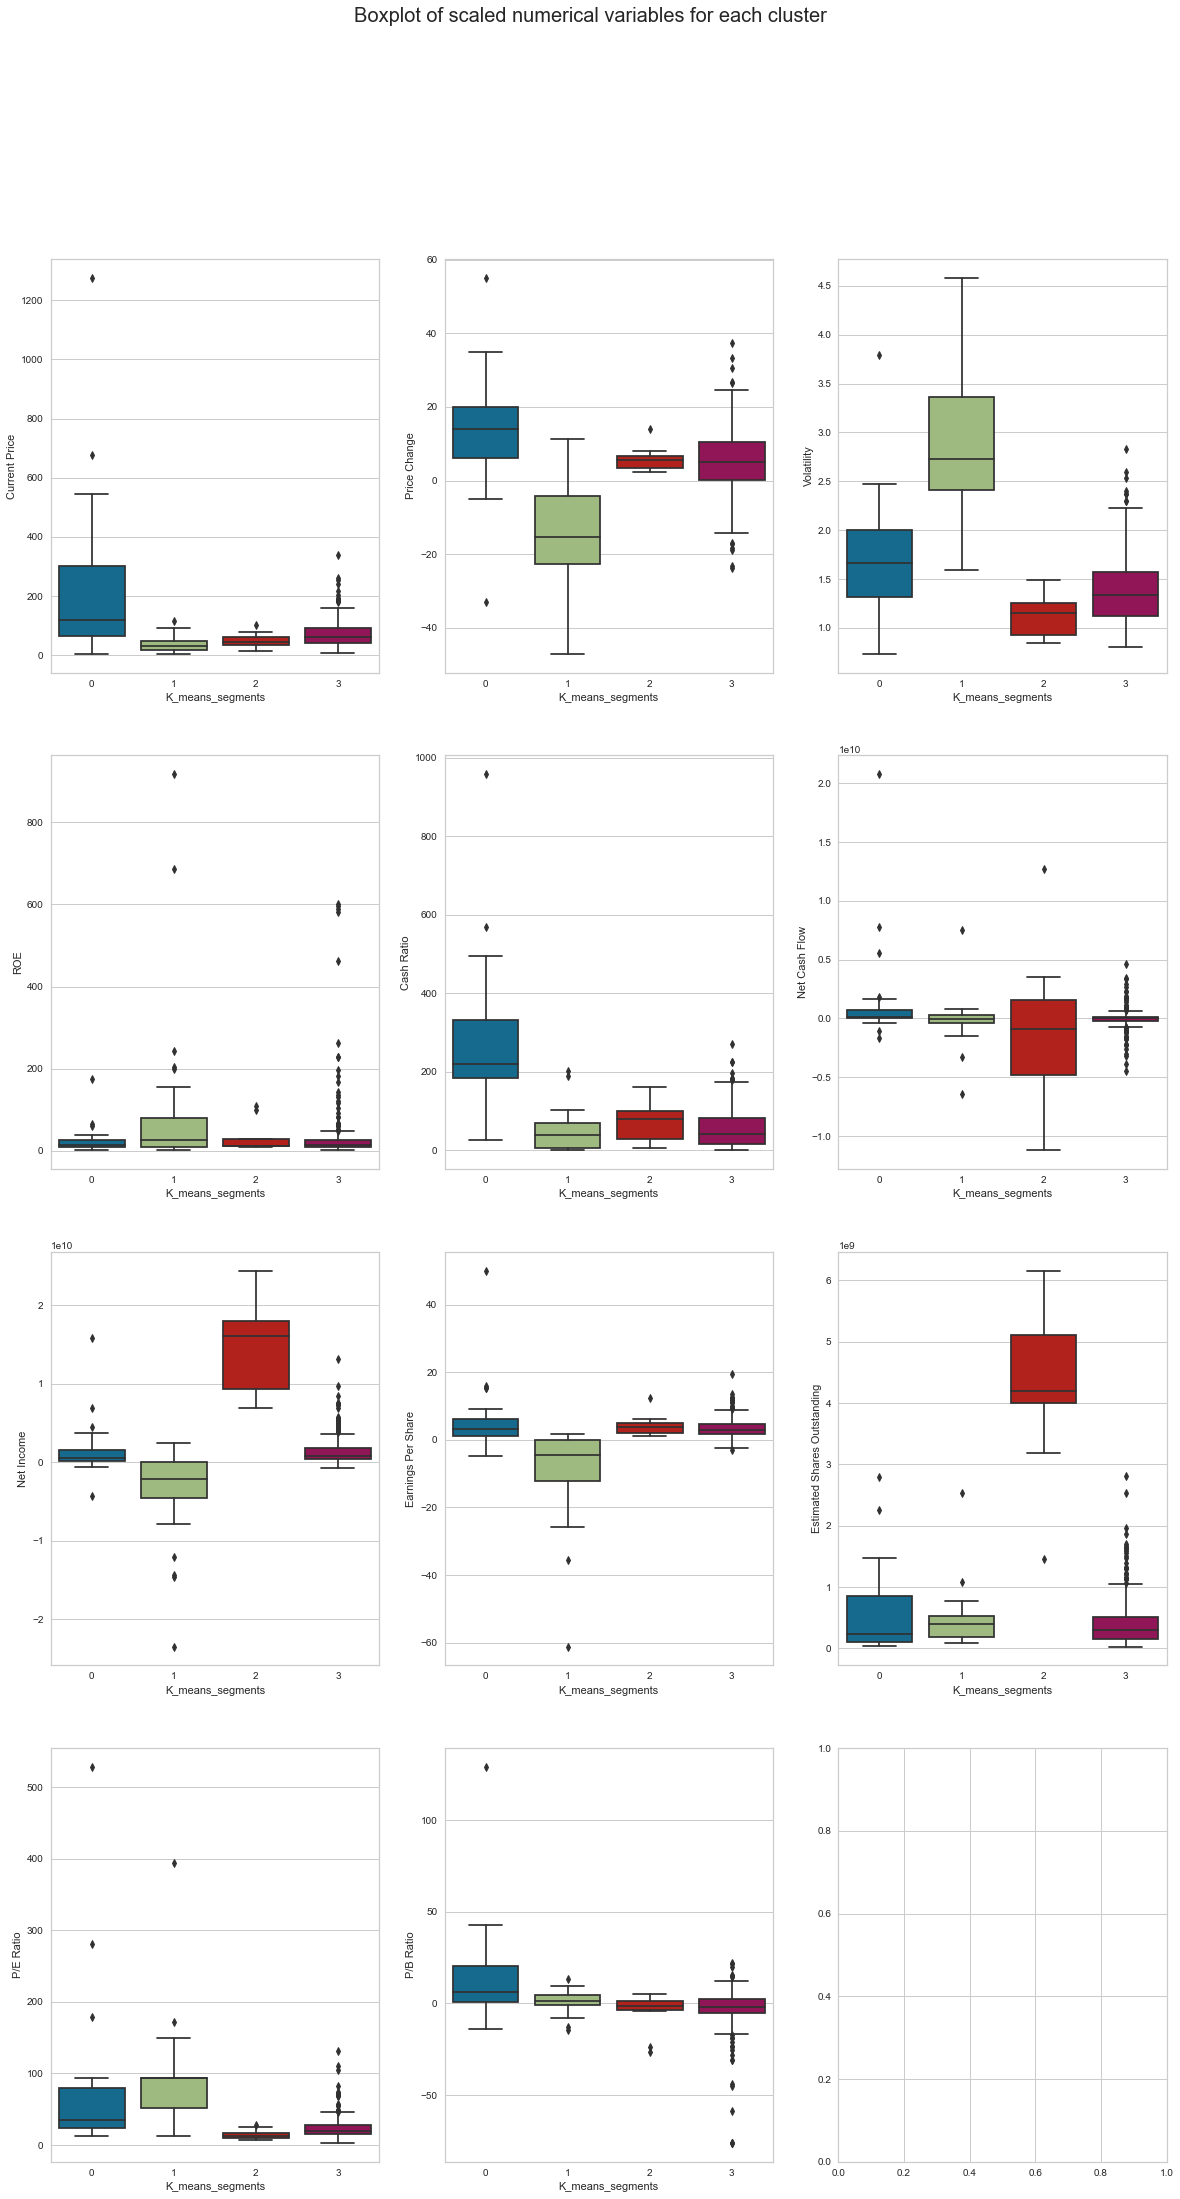

In [147]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0], 
        y=df2[cols_list[counter]],
        x=df2["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=df2[cols_list[counter]],
        x=df2["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=df2[cols_list[counter]],
        x=df2["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Insights

- **Cluster 0**:
    - Highest average current price compared to the other clusters
    - Highest average price change compared to the other clusters
    - Moderate range of volatility
    - Net cash flow mostly positive with many outliers
    - Highest average cash ratio compared to the other clusters

- **Cluster 1**:
    - Only cluster with a average negativeprice change
    - Largest average volatility compared to the other clusters
    - Highest average ROE compared to the other clusters
    - Approximately equal range between stocks with a positive and negative net cash flow
    - Only cluster with a average negative net income
    - Only cluster with average negative earnings per share

- **Cluster 2**:
    - All stocks have a positive price change
    - Low volatility
    - Only cluster with a average negative net cash flow
    - Highest average net income compared to other clusters. All stocks have a positive net income.
    - All stocks have a positive earnings per share
    - Highest average estimated shares outstanding compared to other clusters


- **Cluster 3**:
    - 81.5% of stocks have been added to cluster 3
    - Wide range of stocks with a positive price change and a negative price change. But the average price change is positive with many outliers.
    - Moderate range of volatility with many outliers
    - Many outliers with a high ROE
    - Approximately equal range between stocks with a positive and negative net cash flow. Many outliers
    - Many outliers with a negative P/B ratio

#### Summary

* Based on the insights above, it seems as though clusters 0 and 2 comprise of stocks that are most risk free and show positive returns. However cluster 2 does include stocks with a negative net cash flow. 
* Cluster 0 seems to include some of the safest and best performing stocks. It therefore might make sense to invest in these stocks.   
* Clusters 1 and 3 seem to include stocks that are more volatile and often low performing. Especially cluster 1. It therefore might make sense to avoid investing in these stocks.

## Hierarchical Clustering

In [148]:
hc_df = subset_scaled_df.copy()

In [149]:
%%time

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

* The highest cophenetic correlation is 0.942, which is the Euclidean distance and average linkage.
* Let's explore difference linkage methods with Euclidean distance only.

In [150]:
%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Wall time: 34 ms


* We see that the cophenetic correlation is maximum (0.942) with Euclidean distance and average linkage.
* Followed by centroid linkage (0.931)
* Let's see the dendrograms for the difference linkage methods.

Wall time: 3.17 s


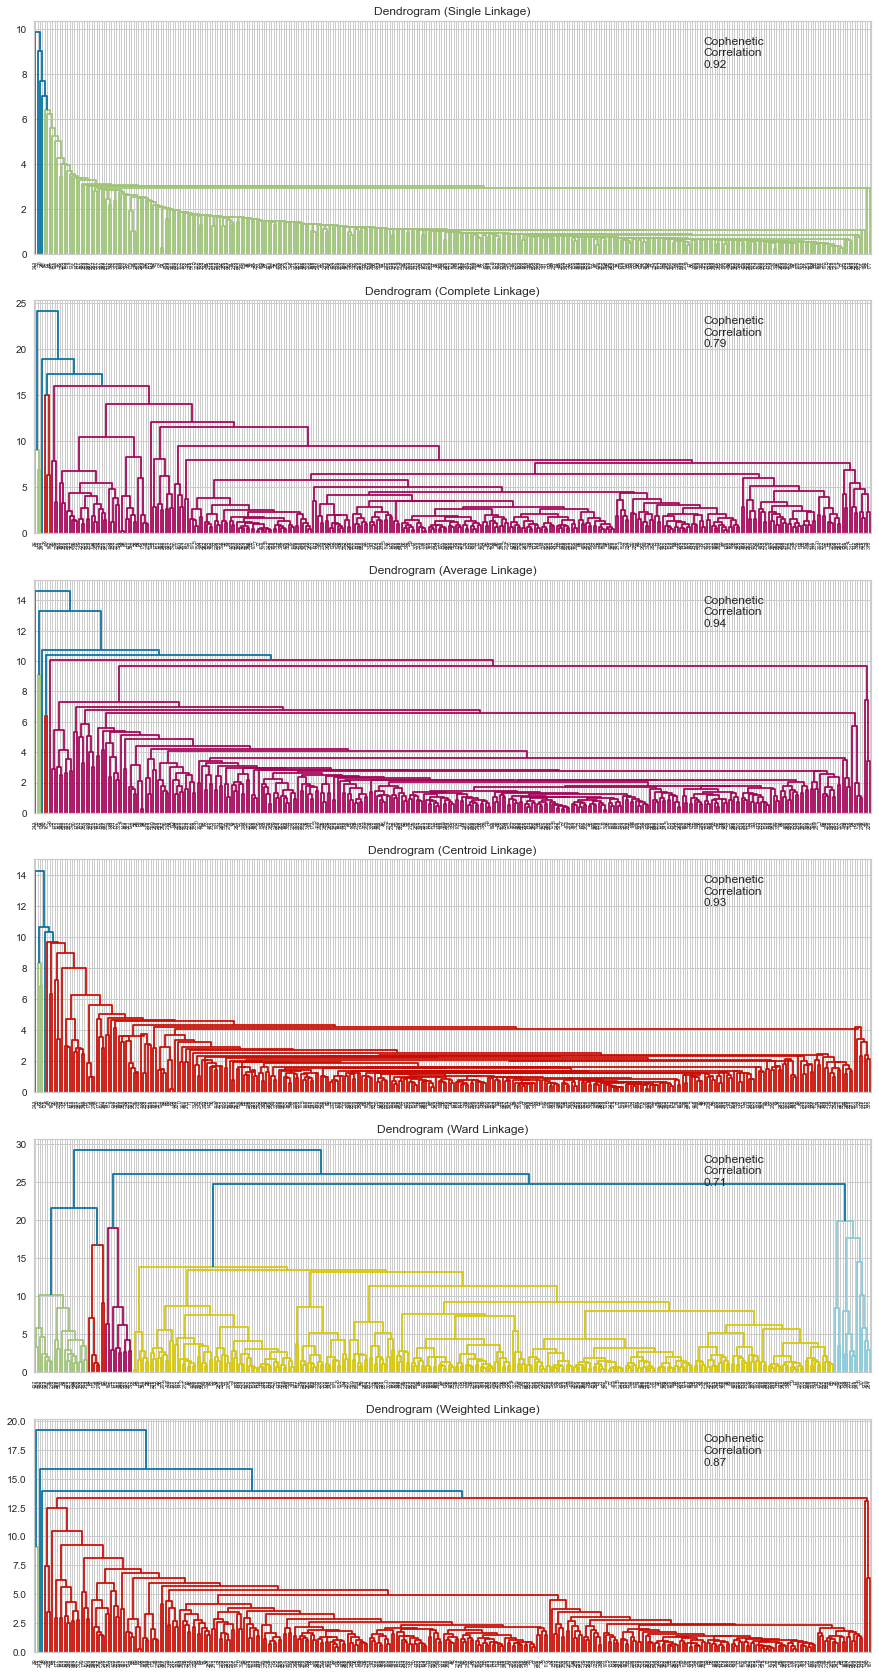

In [151]:
%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* The cophenetic correlation is highest for average and centroid linkage methods.
* We will move ahead with average linkage.
* 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [152]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [153]:
# creating a copy of the original data
df3 = data.copy()

hc_df["HC_Clusters"] = HCmodel.labels_
df3["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [154]:
cluster_profile = df3.groupby("HC_Clusters").mean()

In [155]:
cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Price Change"].count().values
)

In [156]:
# let's see the names of the securities in each cluster
for cl in df3["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df3[df3["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

* We can see that clusters 1,2,3,4 and 5 only include one stock. 
* Cluster 0 includes all the other stocks. 
* This clustering does not look good as the clusters do not have enough variability.
* Let us try using Ward link as it has more distinct and separated clusters (as seen from it's dendrogram before). 
* 4 appears to be the appropriate number of clusters.

In [157]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [158]:
hc_df["HC_Clusters"] = HCmodel.labels_
df3["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling with Ward

In [159]:
cluster_profile = df3.groupby("HC_Clusters").mean()

In [160]:
cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Price Change"].count().values
)

In [161]:
# let's see the names of the countries in each cluster
for cl in df3["HC_Clusters"].unique():
    print(
        "The",
        df3[df3["HC_Clusters"] == cl]["Security"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df3[df3["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 275 countries in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.

* Now the clusters have more variability

In [162]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275


IndexError: list index out of range

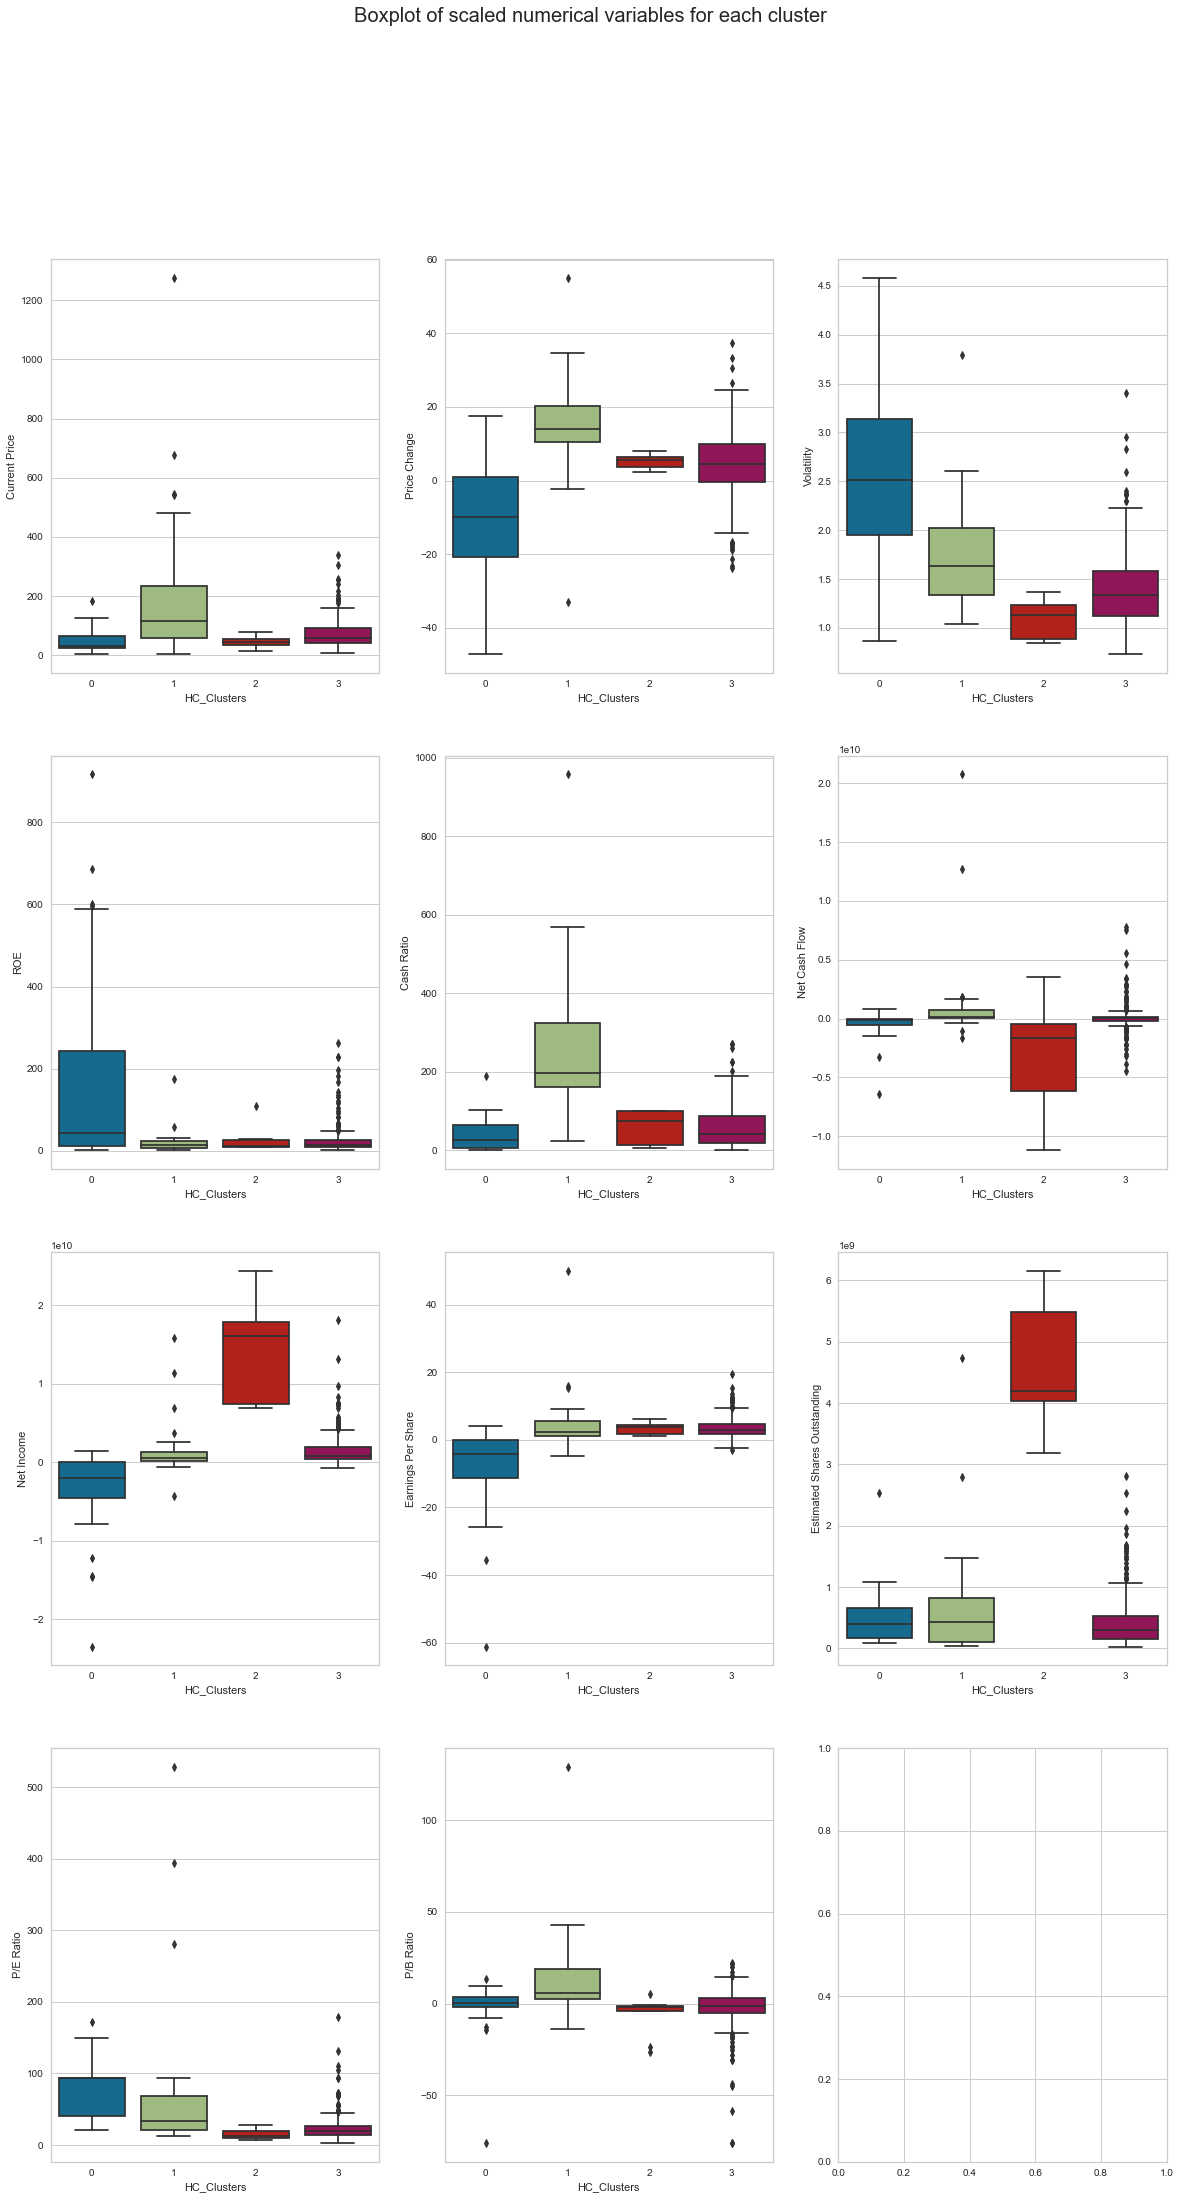

In [163]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=df3[cols_list[counter]],
        x=df3["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=df3[cols_list[counter]],
        x=df3["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=df3[cols_list[counter]],
        x=df3["HC_Clusters"],
    )
    counter = counter + 1

#### Insights

- **Cluster 0**:
    - Only cluster with a average negative price change
    - Largest average volatility compared to the other clusters
    - Highest average ROE compared to the other clusters
    - Approximately equal range between stocks with a positive and negative net cash flow
    - Only cluster with a average negative net income
    - Only cluster with average negative earnings per share

- **Cluster 1**:
    - Highest average current price compared to the other clusters
    - Highest average price change compared to the other clusters
    - Moderate range of volatility
    - Net cash flow mostly positive with many outliers
    - Highest average cash ratio compared to the other clusters

- **Cluster 2**:
    - All stocks have a positive price change
    - Low volatility
    - Only cluster with a average negative net cash flow
    - Highest average net income compared to other clusters. All stocks have a positive net income.
    - All stocks have a positive earnings per share
    - Highest average estimated shares outstanding compared to other clusters


- **Cluster 3**:
    - 80.9% of stocks have been added to cluster 3
    - Wide range of stocks with a positive price change and a negative price change. But the average price change is positive with many outliers.
    - Moderate of volatility with many outliers
    - Many outliers with a high ROE
    - Approximately equal range between stocks with a positive and negative net cash flow. Many outliers
    - Many outliers with a negative P/B ratio

#### Summary

* Based on the insights above, it seems as though clusters 1 and 2 comprise of stocks that are most risk free and show positive returns. However cluster 2 does include stocks with a negative net cash flow. 
* Cluster 1 seems to include some of the safest and best performing stocks. It therefore might make sense to invest in these stocks.   
* Clusters 0 and 3 seem to include stocks that are more volatile and often low performing. Especially cluster 0. It therefore might make sense to avoid investing in these stocks.

## K-means vs Hierarchical Clustering

- **Which clustering technique took less time for execution?**
- The Hierarchical Clustering was faster. Each step took between 1 second to 3 seconds. The K-means clustering took about 10 seconds per step.


- **Which clustering technique gave you more distinct clusters, or are they the same?**
- Identifying the good number of clusers for the dataset was challenging using both techniques.
- K-means hinted towards a cluster between 3 - 6 and Hierarchical hinted towards a cluster between 4 - 6.
- However after further analysis with Hierarchical clustering, it was clear that 6 was too high due to low variability. This in turn helped to narrow the focus.


- **How many observations are there in the similar clusters of both algorithms?**
- Distribution between clusters were very similar. 
- K-means was divided in the following 81.5%, 7.9%, 7.4%, 3.2%
- Hierarchical was divided in the following: 80.9%, 8.5%, 7.9%, 2.6%
- Cluster 3 for both techniques had the largest group of stocks
- Cluster 2 for both techniques had the smallest group of stocks


- **How many clusters are obtained as the appropriate number of clusters from both algorithms?**
- Both clusters seem to suggest 4 clusters to be appropriate for this dataset.


- **You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.**
- When looking at the boxplots. The patterns are almost identifcal.
- The only difference is that in K-means cluster 0 is the same as Hierarchical cluster 1. And K-means cluster 1 is the same as Hierarchical cluster 0.
- Both clustering techniques helped differenciate the dataset enough to make recommendations about which cluster to target for investing and which ones to avoid. 

## Actionable Insights and Recommendations

- **Cluster 0 (k-means) / Cluster 1 (hierarchical)**
- Within the last 13 weeks, these stocks showed stable volatility and positive price changes. Therefore these stocks seem to be excellent candidates for investing. However, there are a few outliers and the results are based on historical trends. To achieve strong returns it is recommend to compare the different stocks within the cluster before deciding which ones to invest in.    


- **Cluster 1 (k-means) / Cluster 0 (hierarchical)**
- Within the last 13 weeks, these stocks showed high volatility and negative price changes. Therefore these stocks seem to be both risky and low performing candidates for investing. Based on histroical trends it is recommended to not invest in these stocks for the time being. 


- **Cluster 2**
- Within the last 13 weeks, these stocks showed low volatility and a positive price changes. Although these stocks experienced a small positive price change, all of them were positive, with no outliers. Therefore these stocks seem solid candidates for safe positive returns. It should be noted that these stocks also showed patterns of average negative cash flow. This could mean that they are investing heavily into the company since they also had a high average net income. To achieve strong returns it is recommend to compare the different stocks within the cluster before deciding which ones to invest in.  


- **Cluster 3**
- This cluster comprises of >80% of companies within the New York Stock Exchange. This cluster included a wide range of stocks with a positive price change and a negative price change. There were also many outliers. Based on the current cluster it is difficult to identify whether investing in these stocks will provide positive returns, negative returns or zero returns. If the company wishes to invest in these stocks, it would be recommended to divide these stocks into smaller sub-clusters. However at this moment, based on the current analysis, it is recommended to focus on clusters 0 (k-means)/ cluster 1 (hierarchical) and cluster 2.